In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('reviews.csv')

df.info()

print(df.isnull().sum())

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        2221 non-null   object 
 1   review       5352 non-null   object 
 2   stars        5353 non-null   float64
 3   productname  5353 non-null   object 
 4   platform     5353 non-null   object 
dtypes: float64(1), object(4)
memory usage: 209.2+ KB
title          3132
review            1
stars             0
productname       0
platform          0
dtype: int64
              title                                             review  stars  \
0               NaN                                       Very helpful    5.0   
1               NaN                   It never works when you need it.    1.0   
2    WASTE OF MONEY  What a waste! 8 for everything single thing🫨 a...    1.0   
3               NaN  Won't allow me to add my car. It says my cars ...    1.0   
4  Ian is a pro!!!!  Thank y

productname
TOYOTA    4362
LEXUS      991
Name: count, dtype: int64
platform
ANDROID    3131
IOS        2222
Name: count, dtype: int64
stars
1.0    1995
2.0     376
3.0     433
4.0     430
5.0    2119
Name: count, dtype: int64


C:\Users\ujjwa\AppData\Local\Temp\ipykernel_23824\2768857037.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=df, palette='viridis', order=df['stars'].value_counts().sort_index().index)
C:\Users\ujjwa\AppData\Local\Temp\ipykernel_23824\2768857037.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='productname', data=df, palette='plasma')
C:\Users\ujjwa\AppData\Local\Temp\ipykernel_23824\2768857037.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='platform', data=df, palette='magma')


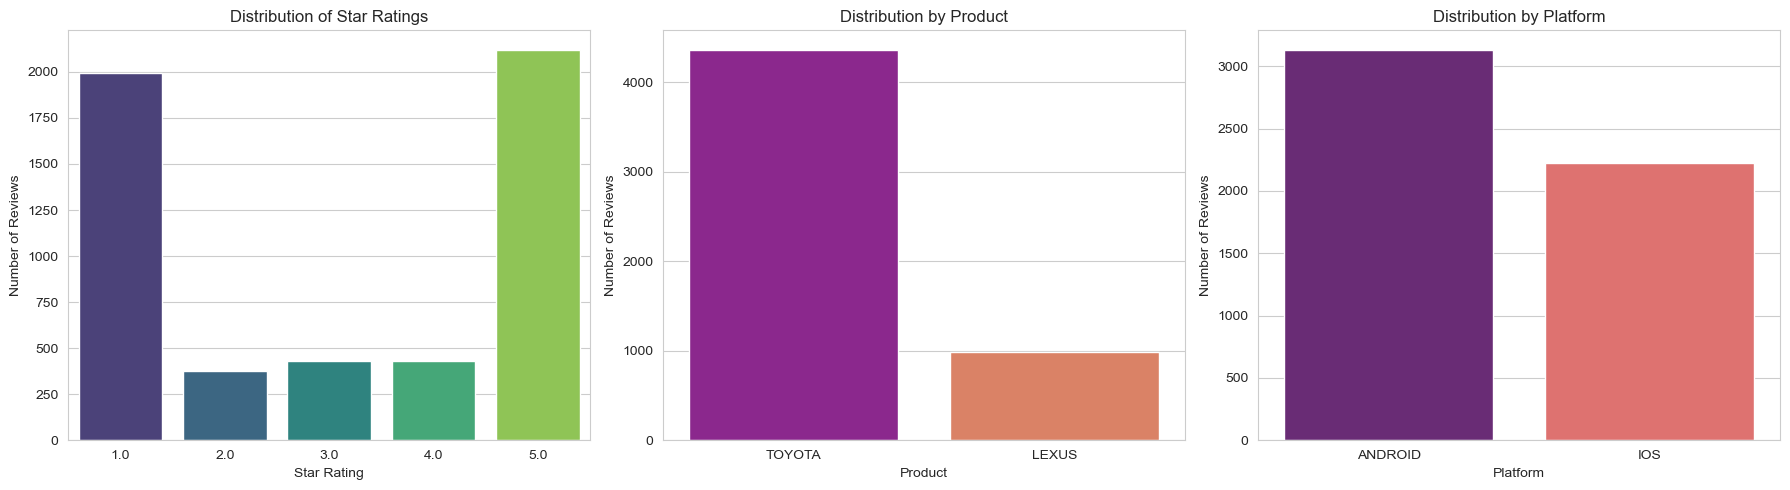

In [3]:
print(df['productname'].value_counts())
print(df['platform'].value_counts())
print(df['stars'].value_counts().sort_index())

sns.set_style("whitegrid")

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='stars', data=df, palette='viridis', order=df['stars'].value_counts().sort_index().index)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')

plt.subplot(1, 3, 2)
sns.countplot(x='productname', data=df, palette='plasma')
plt.title('Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Number of Reviews')

plt.subplot(1, 3, 3)
sns.countplot(x='platform', data=df, palette='magma')
plt.title('Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

df['review_text'] = df['title'].fillna('') + ' ' + df['review'].fillna('')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    return ' '.join(lemmatized_tokens)

df['cleaned_review'] = df['review_text'].apply(clean_text)

print(df[['review_text', 'cleaned_review']].head())

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ujjwa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ujjwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ujjwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                         review_text  \
0                                       Very helpful   
1                   It never works when you need it.   
2  WASTE OF MONEY What a waste! 8 for everything ...   
3   Won't allow me to add my car. It says my cars...   
4  Ian is a pro!!!! Thank you so much Ian Saeed K...   

                                      cleaned_review  
0                                            helpful  
1                                    never work need  
2  waste money waste everything single thing mont...  
3  wont allow add car say car vin incorrect even ...  
4  ian pro thank much ian saeed khan helping u pu...  


               term  count
2571            app   2949
9565            car   1005
60977        toyota    837
69447          work    824
59702          time    528
55770         start    493
43624         phone    493
66501       vehicle    475
65056           use    473
49116        remote    450
64185        update    445
18433        doesnt    441
52986       service    314
38974          need    285
22326       feature    281
42527           pay    280
18935          dont    271
39480           new    265
31308           key    264
13507       connect    256
49305  remote start    246
36103          make    243
65787       useless    242
51479           say    228
69207          wont    227


C:\Users\ujjwa\AppData\Local\Temp\ipykernel_23824\662340373.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='term', data=top_15_terms, palette='rocket')


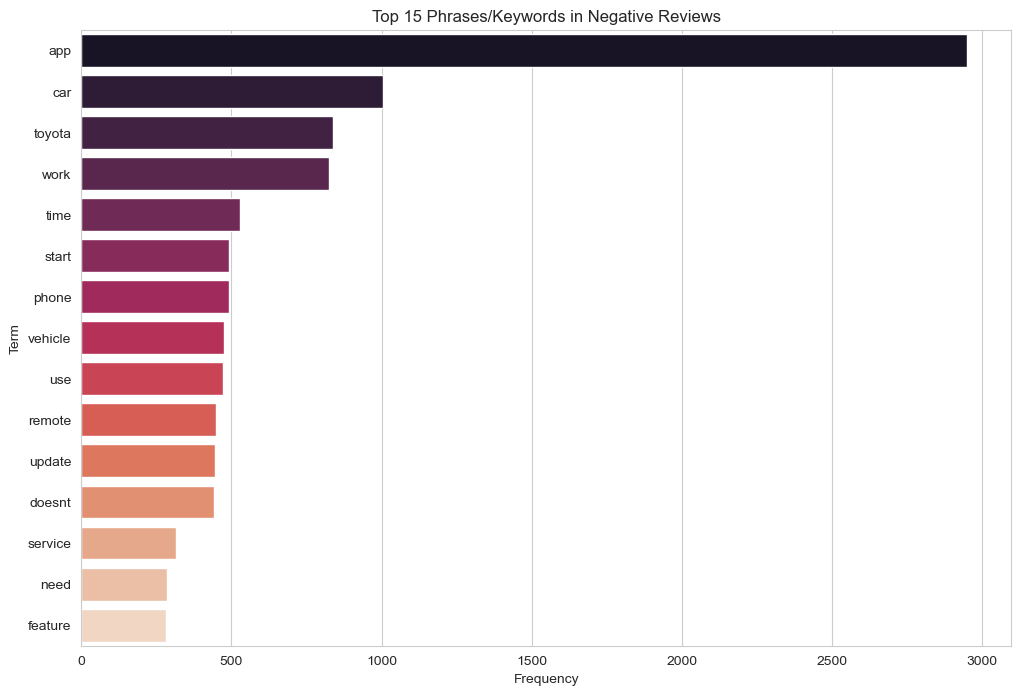

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

negative_reviews_df = df[df['stars'].isin([1, 2])].copy()

vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words='english')
X = vectorizer.fit_transform(negative_reviews_df['cleaned_review'].dropna())
feature_names = vectorizer.get_feature_names_out()

sums = X.sum(axis=0)
data = []
for col, term in enumerate(feature_names):
    data.append((term, sums[0, col]))

ranking = pd.DataFrame(data, columns=['term', 'count'])
top_terms = ranking.sort_values('count', ascending=False)

print(top_terms.head(25))

plt.figure(figsize=(12, 8))
top_15_terms = top_terms.head(15)
sns.barplot(x='count', y='term', data=top_15_terms, palette='rocket')
plt.title('Top 15 Phrases/Keywords in Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Term')
plt.show()

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_23824\3446076455.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Complaint Count', y='Feature', data=complaint_volume, palette='Reds_r')
C:\Users\ujjwa\AppData\Local\Temp\ipykernel_23824\3446076455.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Star Rating', y='Feature', data=complaint_severity, palette='coolwarm')


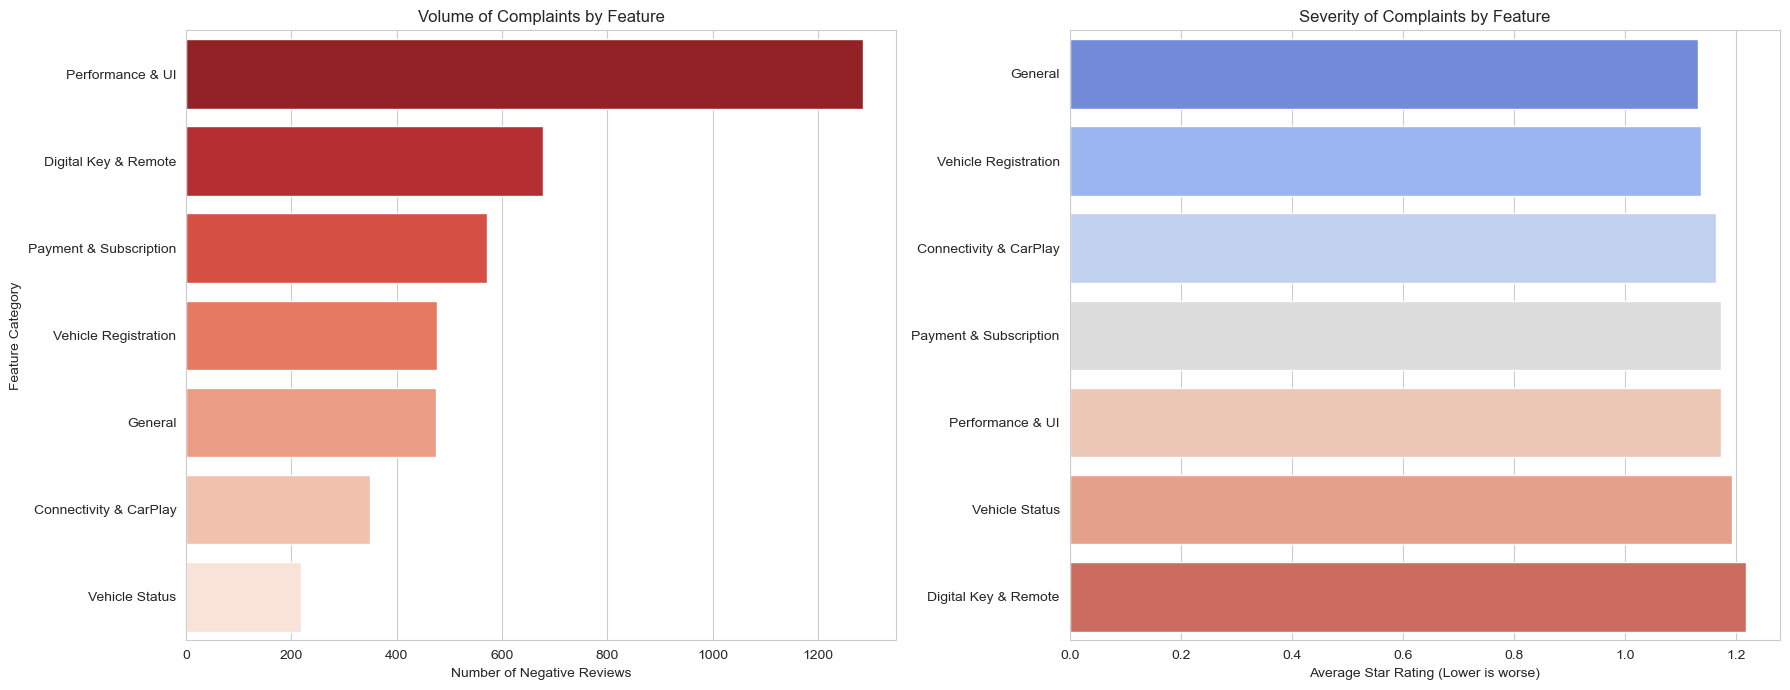

                  Feature  Complaint Count
0        Performance & UI             1285
1    Digital Key & Remote              678
2  Payment & Subscription              571
3    Vehicle Registration              477
4                 General              474
5  Connectivity & CarPlay              349
6          Vehicle Status              218
                  Feature  Average Star Rating
0                 General             1.130802
1    Vehicle Registration             1.136268
2  Connectivity & CarPlay             1.163324
3  Payment & Subscription             1.173380
4        Performance & UI             1.173541
5          Vehicle Status             1.192661
6    Digital Key & Remote             1.218289


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feature_keywords = {
    'Digital Key & Remote': ['key', 'fob', 'remote', 'start', 'lock', 'unlock'],
    'Vehicle Registration': ['vin', 'add vehicle', 'add car', 'register', 'vehicle'],
    'Connectivity & CarPlay': ['connect', 'connecting', 'connection', 'bluetooth', 'carplay', 'apple car', 'android auto'],
    'Payment & Subscription': ['payment', 'pay', 'subscription', 'bill', 'charge', 'fee', 'cost'],
    'Performance & UI': ['slow', 'load', 'crash', 'update', 'work', 'login', 'interface', 'ui', 'glitchy', 'buggy'],
    'Vehicle Status': ['tire pressure', 'tire', 'pressure', 'status', 'location', 'mileage', 'gas']
}

def categorize_review(review_text):
    categories = []
    for category, keywords in feature_keywords.items():
        if any(keyword in review_text for keyword in keywords):
            categories.append(category)
    return categories if categories else ['General']

negative_reviews_df['categories'] = negative_reviews_df['cleaned_review'].apply(categorize_review)

exploded_df = negative_reviews_df.explode('categories')

complaint_volume = exploded_df['categories'].value_counts().reset_index()
complaint_volume.columns = ['Feature', 'Complaint Count']

complaint_severity = exploded_df.groupby('categories')['stars'].mean().sort_values().reset_index()
complaint_severity.columns = ['Feature', 'Average Star Rating']

plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='Complaint Count', y='Feature', data=complaint_volume, palette='Reds_r')
plt.title('Volume of Complaints by Feature')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('Feature Category')

plt.subplot(1, 2, 2)
sns.barplot(x='Average Star Rating', y='Feature', data=complaint_severity, palette='coolwarm')
plt.title('Severity of Complaints by Feature')
plt.xlabel('Average Star Rating (Lower is worse)')
plt.ylabel('')

plt.tight_layout()
plt.show()

print(complaint_volume)
print(complaint_severity)